In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Teacher Ferdin/fishdata.csv', encoding = 'unicode_escape',header = None)
column_names = ['Year','Month','Day','Hour','Minute','Second','Carbon_Monoxide','PM_2.5','External_Temperature','Humidity','Internal_Temperature',' ']
df.columns = column_names
df.drop(index = df.index[0], inplace = True)
df.head()

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Month,Day,Hour,Minute,Second,Carbon_Monoxide,PM_2.5,External_Temperature,Humidity,Internal_Temperature,
1,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.0,27.19,4.39
2,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.0,27.19,4.38
3,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.0,27.19,4.38
4,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.0,27.19,4.41
5,2020.0,6.0,18,14,31.0,13.0,201,25.0,29.0,95.0,27.25,4.41


In [3]:
df.dtypes

Year                    float64
Month                   float64
Day                       int64
Hour                      int64
Minute                  float64
Second                  float64
Carbon_Monoxide          object
PM_2.5                  float64
External_Temperature    float64
Humidity                float64
Internal_Temperature    float64
                        float64
dtype: object

In [4]:
df['Carbon_Monoxide'] = df['Carbon_Monoxide'].apply(pd.to_numeric, errors='coerce')

In [5]:
pivot_cols = ['Month','External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide']
pivot_df = df[pivot_cols]
pivot_df.head()

,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide
1,6.0,29.0,27.19,95.0,201.0
2,6.0,29.0,27.19,95.0,201.0
3,6.0,29.0,27.19,95.0,201.0
4,6.0,29.0,27.19,95.0,201.0
5,6.0,29.0,27.25,95.0,201.0


In [2]:
pivot_table = pd.pivot_table(pivot_df,index = 'Month', 
                             values = ['External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide'], 
                             aggfunc=np.mean)
pivot_table.head()

NameError: name 'df' is not defined

In [7]:
pivot_df.describe()

,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide
count,8.119460e+05,811851.000000,811843.000000,811843.000000,810195.000000
mean,2.617098e+00,30.827049,28.486738,94.627387,212.696645
std,2.519275e+03,5.682789,2.600313,5.387394,52.229390
min,-1.912020e+06,-999.000000,2.970000,-999.000000,-183.000000
25%,7.000000e+00,29.000000,27.060000,95.000000,183.000000
50%,7.000000e+00,30.000000,28.250000,95.000000,198.000000
75%,8.000000e+00,32.000000,30.250000,95.000000,244.000000
max,2.020000e+03,310.000000,95.000000,95.000000,334.000000


In [8]:
pivot_df.isnull().sum()

Month                      0
External_Temperature      95
Internal_Temperature     103
Humidity                 103
Carbon_Monoxide         1751
dtype: int64

In [9]:
pivot_df.shape

(811946, 5)

In [10]:
pivot_df.dropna().shape

(810164, 5)

In [11]:
#removing irregular month
pivot_df.drop(pivot_df[pivot_df['Month'] < 0].index, inplace = True)
pivot_df.drop(pivot_df[pivot_df['Month'] > 12].index, inplace = True)

#removing irregular external temperature
pivot_df.drop(pivot_df[pivot_df['External_Temperature'] < 0].index, inplace = True)

#removing irregularities in humidity
pivot_df.drop(pivot_df[pivot_df['Humidity'] < 0].index, inplace = True)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\sit

In [12]:
new_pivot_table = pd.pivot_table(pivot_df,index = 'Month', 
                             values = ['External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide'], 
                             aggfunc=np.mean)
new_pivot_table.head()

,Carbon_Monoxide,External_Temperature,Humidity,Internal_Temperature
Month,,,,
6.0,263.695942,29.523070,95.000000,28.768610
7.0,214.589750,31.784893,94.679568,29.164226
8.0,170.644520,31.439748,94.445248,28.217644
9.0,181.894307,29.370660,94.230240,26.458460
10.0,182.701963,28.678679,94.234710,26.327375


In [33]:
new_pivot_table.describe()

,Carbon_Monoxide,External_Temperature,Humidity,Internal_Temperature
count,5.000000,5.000000,5.000000,5.000000
mean,202.705297,30.159410,94.517953,27.787263
std,37.822689,1.369405,0.326642,1.317316
min,170.644520,28.678679,94.230240,26.327375
25%,181.894307,29.370660,94.234710,26.458460
50%,182.701963,29.523070,94.445248,28.217644
75%,214.589750,31.439748,94.679568,28.768610
max,263.695942,31.784893,95.000000,29.164226


In [13]:
x = new_pivot_table.index
y1 = new_pivot_table['Carbon_Monoxide']
y2 = new_pivot_table['External_Temperature']
y3 = new_pivot_table['Humidity']
y4 = new_pivot_table['Internal_Temperature']

Text(0.5, 1.0, 'Internal Temperature')

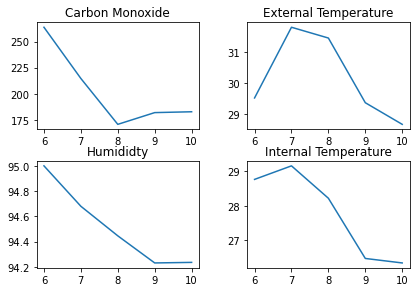

In [17]:
fig,axs = plt.subplots(2,2)
fig.tight_layout()

axs[0,0].plot(x,y1)
axs[0,0].set_title('Carbon Monoxide')

axs[0,1].plot(x,y2)
axs[0,1].set_title('External Temperature')

axs[1,0].plot(x,y3)
axs[1,0].set_title('Humididty')

axs[1,1].plot(x,y4)
axs[1,1].set_title('Internal Temperature')

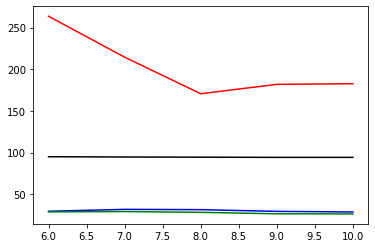

In [15]:
plt.plot(x,
         y1,'r-',
         y2,'b-',
         y3,'black',
         y4,'g-')

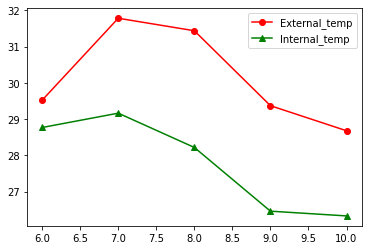

In [74]:
plt.plot(x,y2,'ro-',label = 'External_temp')
plt.plot(x,y4,'g^-',label = 'Internal_temp')
plt.legend()

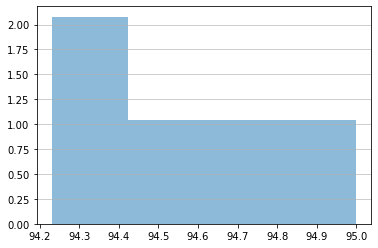

In [51]:
#histogram
plt.hist(y3, bins = 4, density = True, histtype = 'stepfilled', alpha = 0.5)
plt.grid(axis='y', alpha=0.75)
plt.show()

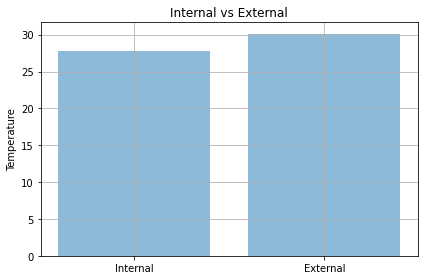

In [55]:
In_mean = y4.mean()
Ex_mean = y2.mean()

Temp = ['Internal', 'External']
x_pos = np.arange(len(Temp))
CTEs = [In_mean , Ex_mean]
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Temperature')
ax.set_xticks(x_pos)
ax.set_xticklabels(Temp)
ax.set_title('Internal vs External')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Internal vs External.png')
plt.show()